In [167]:
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import datetime
import numpy as np

In [125]:
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electric': 'GE',
    'American Express': 'AXP',
    'PepsiCo': 'PEP',
    'The Coca-Cola Company': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'ExxonMobil': 'XOM',
    'Chevron Corporation': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC',
    'Alphabet (Google)': 'GOOGL',
    'Meta': 'META',
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'NVIDIA Corporation': 'NVDA',
    'Salesforce.com': 'CRM',
    'Adobe': 'ADBE',
    'PayPal Holdings': 'PYPL',
    'Square': 'SQ',
    'Johnson & Johnson': 'JNJ',
    'Pfizer': 'PFE',
    'Merck & Co., Inc.': 'MRK',
    'JPMorgan Chase & Co.': 'JPM',
    'Goldman Sachs Group, Inc.': 'GS',
    'Morgan Stanley': 'MS',
    'Nike, Inc.': 'NKE',
    'The Walt Disney Company': 'DIS',
    'Twitter, Inc.': 'X',
    'Uber Technologies, Inc.': 'UBER',
    'Zoom Video Communications, Inc.': 'ZM',
    'Modern': 'MRNA',
    'SpaceX': 'Private'
}


In [126]:
import yfinance as yf
import datetime


start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2023,9, 20)

ticker_symbols = list(companies_dict.values())

stock_data = pd.DataFrame(yf.download(ticker_symbols, start=start_date, end=end_date))


[*********************100%%**********************]  45 of 45 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PRIVATE']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [127]:
stock_data.head()

Adj Close                                                \
                          AAPL        ADBE       AMZN        AXP          BA   
Date                                                                           
2019-01-02 00:00:00  37.943260  224.570007  76.956497  89.451683  314.645142   
2019-01-03 00:00:00  34.163830  215.699997  75.014000  87.705627  302.100555   
2019-01-04 00:00:00  35.622253  226.190002  78.769501  91.657700  317.822571   
2019-01-07 00:00:00  35.542969  229.259995  81.475502  92.155235  318.823425   
2019-01-08 00:00:00  36.220528  232.679993  82.829002  92.605835  330.891907   

                                                                             \
                           BAC         CRM        CVX         DIS         F   
Date                                                                          
2019-01-02 00:00:00  22.276150  135.550003  89.766106  107.654343  6.451037   
2019-01-03 00:00:00  21.919161  130.399994  88.046844  105.046211  6.353046   
2019-01-04 00:00:00  22.829477  137.960007  89.871544  108.286606  6.598021   
2019-01-07 00:00:00  22.811630  142.220001  91.039337  109.225136  6.769505   
2019-01-08 00:00:00  22.767014  145.720001  90.641960  110.074753  6.834832   

                     ...    Volume                                             \
                     ...        SQ      TM       TSLA       TXN UBER      VLO   
Date                 ...                                                        
2019-01-02 00:00:00  ...  13434000  169900  174879000   6478800  NaN  4271900   
2019-01-03 00:00:00  ...  19076300  309500  104478000  11667500  NaN  3300800   
2019-01-04 00:00:00  ...  30228600  307500  110911500   7707600  NaN  4364500   
2019-01-07 00:00:00  ...  18146900  156100  113268000   5023900  NaN  3833600   
2019-01-08 00:00:00  ...  21511800  150400  105127500   5863500  NaN  3087700   

                                                      
                         WBA         X       XOM  ZM  
Date                                                  
2019-01-02 00:00:00  5528100   7803700  16727200 NaN  
2019-01-03 00:00:00  5853200   8359100  13866100 NaN  
2019-01-04 00:00:00  6868600  10737800  16043600 NaN  
2019-01-07 00:00:00  6192500  12320700  10844200 NaN  
2019-01-08 00:00:00  6548100   8463400  11439000 NaN  

[5 rows x 270 columns]

In [128]:
stock_data.shape

(1187, 270)

In [129]:
stock_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'ADBE'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CRM'),
            ('Adj Close',  'CVX'),
            ('Adj Close',  'DIS'),
            ('Adj Close',    'F'),
            ...
            (   'Volume',   'SQ'),
            (   'Volume',   'TM'),
            (   'Volume', 'TSLA'),
            (   'Volume',  'TXN'),
            (   'Volume', 'UBER'),
            (   'Volume',  'VLO'),
            (   'Volume',  'WBA'),
            (   'Volume',    'X'),
            (   'Volume',  'XOM'),
            (   'Volume',   'ZM')],
           length=270)

In [130]:
stock_data.reset_index(inplace=True)

In [131]:
stock_data.dropna(axis=1,inplace=True)

In [132]:
stock_data.isnull().sum().sum()

0

In [133]:
stock_open=np.array(stock_data['Open']).T
stock_close=np.array(stock_data['Close']).T

In [134]:
movement=stock_close-stock_open

In [135]:
movement_df=pd.DataFrame(movement.T,columns=stock_data['Open'].columns,index=stock_data['Date'].tolist())

In [136]:
movement_df.shape

(1187, 42)

In [137]:
movement_df.head()

,AAPL,ADBE,AMZN,AXP,BA,BAC,CRM,CVX,DIS,F,...,PFE,PYPL,SQ,TM,TSLA,TXN,VLO,WBA,X,XOM
2019-01-02,0.757500,4.660004,3.696495,1.769997,7.619995,0.879999,2.150009,3.350006,0.870003,0.37,...,0.123341,3.370003,3.100002,1.599998,0.268000,1.689995,1.739998,0.840004,0.719999,2.340004
2019-01-03,-0.447498,-5.180008,-0.986504,-1.360001,-8.589996,-0.380001,-3.080002,-2.489998,-2.150002,-0.19,...,-1.138523,-2.270004,-3.160004,-1.199997,-0.442667,-2.950005,-1.740005,-0.470001,0.100000,-1.379997
2019-01-04,0.932499,6.350006,2.269501,2.269997,10.389984,0.480000,4.460007,0.540001,1.669998,0.17,...,0.531307,2.559998,3.779999,1.790001,0.779333,2.970001,1.580002,1.139999,1.500000,1.510002
2019-01-07,-0.192501,-0.690002,1.360001,0.400002,-2.410004,0.000000,1.199997,1.200005,0.649994,0.18,...,0.151802,0.510002,1.720001,0.570000,0.882668,1.699997,0.089996,0.820000,-0.480000,0.269997
2019-01-08,0.297501,0.029999,-0.405495,-0.040001,6.420013,-0.209999,0.990005,-1.630005,-0.380005,-0.05,...,-0.123341,0.589996,0.520000,-0.850006,-0.440666,-0.880005,-0.550003,0.850006,0.130001,-0.500000


**Tech Giants**

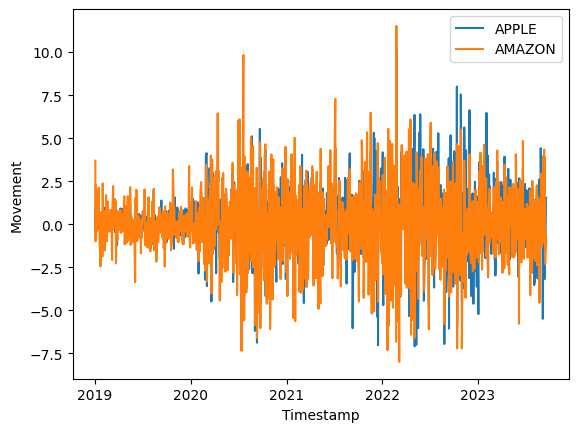

In [138]:
sns.lineplot(x=movement_df.index,y='AAPL',data=movement_df,label='APPLE')
sns.lineplot(x=movement_df.index,y='AMZN',data=movement_df,label='AMAZON')
plt.ylabel('Movement')
plt.xlabel('Timestamp')
plt.show()

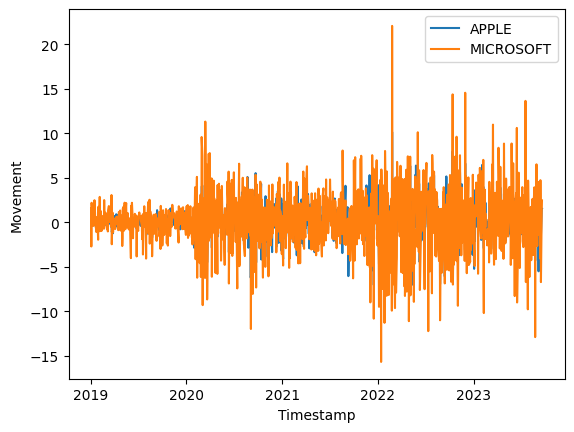

In [139]:
sns.lineplot(x=movement_df.index,y='AAPL',data=movement_df,label='APPLE')
sns.lineplot(x=movement_df.index,y='MSFT',data=movement_df,label='MICROSOFT')
plt.ylabel('Movement')
plt.xlabel('Timestamp')
plt.show()

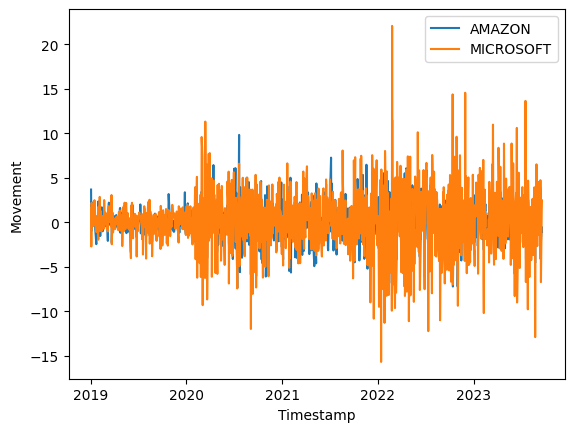

In [140]:
sns.lineplot(x=movement_df.index,y='AMZN',data=movement_df,label='AMAZON')
sns.lineplot(x=movement_df.index,y='MSFT',data=movement_df,label='MICROSOFT')
plt.ylabel('Movement')
plt.xlabel('Timestamp')
plt.show()

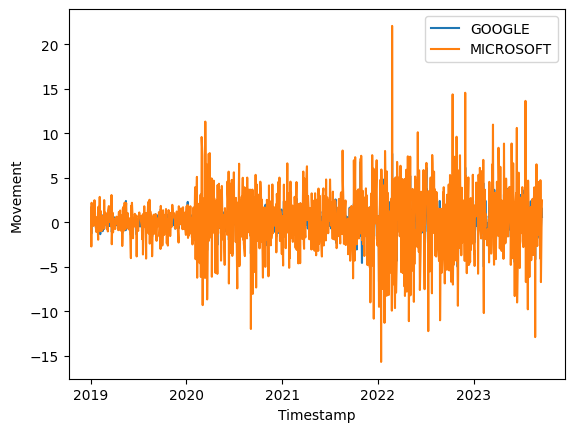

In [141]:
sns.lineplot(x=movement_df.index,y='GOOGL',data=movement_df,label='GOOGLE')
sns.lineplot(x=movement_df.index,y='MSFT',data=movement_df,label='MICROSOFT')
plt.ylabel('Movement')
plt.xlabel('Timestamp')
plt.show()

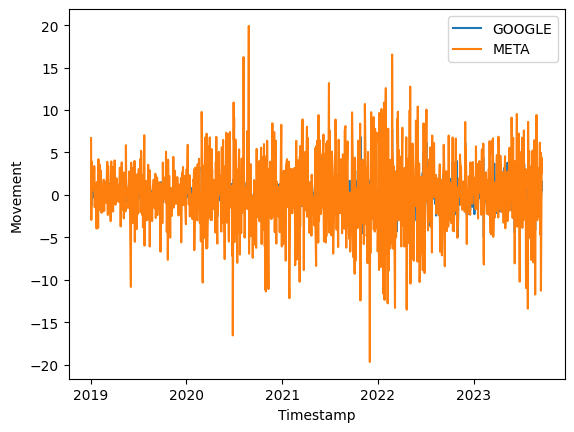

In [142]:
sns.lineplot(x=movement_df.index,y='GOOGL',data=movement_df,label='GOOGLE')
sns.lineplot(x=movement_df.index,y='META',data=movement_df,label='META')
plt.ylabel('Movement')
plt.xlabel('Timestamp')
plt.show()

ALL tech giants companies have same movement of stock throught the time period..

In [143]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movement_df)

In [144]:
norm_movements

array([[ 0.03557979,  0.21888058,  0.17362454, ...,  0.03945502,
         0.0338184 ,  0.10991009],
       [-0.02691637, -0.31156992, -0.05933675, ..., -0.02826989,
         0.00601488, -0.08300482],
       [ 0.03881531,  0.26431929,  0.09446807, ...,  0.04745253,
         0.06243757,  0.06285391],
       ...,
       [-0.06391751, -0.14000839, -0.10000703, ..., -0.00260885,
         0.00304368, -0.05217771],
       [ 0.07006263,  0.38510807, -0.02351086, ..., -0.01457671,
         0.00141068,  0.00517242],
       [ 0.09393718,  0.62665229, -0.06484635, ..., -0.01333295,
         0.03515061, -0.07817988]])

In [145]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.9750135380521384
0.9861893867648008
0.003501237523423435


In [146]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


inertia_values=[]
for k in range(1,51):
  kmeans = KMeans(n_clusters = k,max_iter = 1000)
  kmeans.fit(movement_df)
  inertia_values.append(kmeans.inertia_)



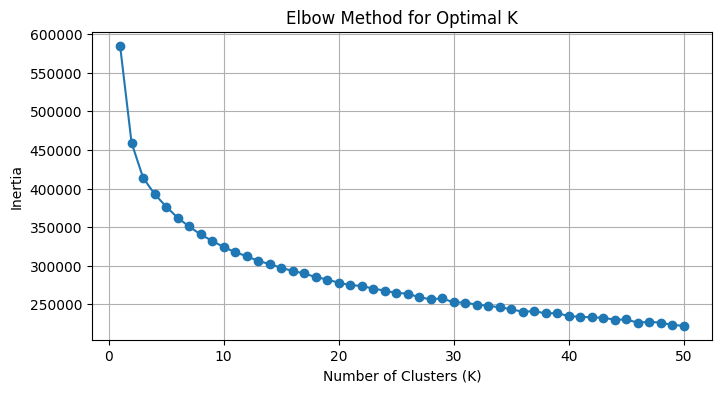

In [147]:
plt.figure(figsize=(8, 4))
plt.plot(list(range(1,51)),inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [148]:
normalizer = Normalizer()

kmeans = KMeans(n_clusters = 10,max_iter = 1000)

pipeline = make_pipeline(normalizer,kmeans)

pipeline.fit(movement)

predictions = pipeline.predict(movement)

In [149]:
predictions

array([2, 2, 2, 5, 3, 5, 2, 4, 5, 0, 3, 2, 5, 0, 0, 2, 1, 5, 7, 7, 0, 7,
       2, 1, 6, 5, 2, 2, 0, 7, 2, 7, 1, 8, 8, 0, 8, 2, 4, 9, 5, 4],
      dtype=int32)

In [150]:
predictions.shape

(42,)

In [151]:
lat_comp=stock_data['Open'].columns
lat_comp

Index(['AAPL', 'ADBE', 'AMZN', 'AXP', 'BA', 'BAC', 'CRM', 'CVX', 'DIS', 'F',
       'GE', 'GOOGL', 'GS', 'HMC', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LMT',
       'MA', 'MCD', 'META', 'MRK', 'MRNA', 'MS', 'MSFT', 'NFLX', 'NKE', 'NOC',
       'NVDA', 'PEP', 'PFE', 'PYPL', 'SQ', 'TM', 'TSLA', 'TXN', 'VLO', 'WBA',
       'X', 'XOM'],
      dtype='object')

In [152]:
company=[]
for comp in lat_comp:
  for j in companies_dict.items():
    if comp in j:
      company.append(j[0])

In [153]:
df = pd.DataFrame({'labels':predictions,'companies':company})

In [163]:
print('Clusters of Stocks with Same Movements by Various Companies')
stock_clusters = dict()

for comp in df.values:
    cluster_no = comp[0]
    company_name = comp[1]

    if cluster_no not in stock_clusters:
        stock_clusters[cluster_no] = [company_name]
    else:
        stock_clusters[cluster_no].append(company_name)
print(stock_clusters)

Clusters of Stocks with Same Movements by Various Companies
{2: ['Apple', 'Adobe', 'Amazon', 'Salesforce.com', 'Alphabet (Google)', 'Intel', 'Meta', 'Microsoft', 'Netflix', 'NVIDIA Corporation', 'Texas Instruments'], 5: ['American Express', 'Bank of America', 'The Walt Disney Company', 'Goldman Sachs Group, Inc.', 'JPMorgan Chase & Co.', 'Morgan Stanley', 'Twitter, Inc.'], 3: ['Boeing', 'General Electric'], 4: ['Chevron Corporation', 'Valero Energy', 'ExxonMobil'], 0: ['Ford', 'Honda', 'IBM', 'MasterCard', 'Nike, Inc.', 'Toyota'], 1: ['Johnson & Johnson', 'Merck & Co., Inc.', 'Pfizer'], 7: ['The Coca-Cola Company', 'Lockheed Martin', 'McDonalds', 'Northrop Grumman', 'PepsiCo'], 6: ['Modern'], 8: ['PayPal Holdings', 'Square', 'Tesla'], 9: ['Walgreen']}


In [166]:
for i in stock_clusters.keys():
  print(stock_clusters[i])

['Apple', 'Adobe', 'Amazon', 'Salesforce.com', 'Alphabet (Google)', 'Intel', 'Meta', 'Microsoft', 'Netflix', 'NVIDIA Corporation', 'Texas Instruments']
['American Express', 'Bank of America', 'The Walt Disney Company', 'Goldman Sachs Group, Inc.', 'JPMorgan Chase & Co.', 'Morgan Stanley', 'Twitter, Inc.']
['Boeing', 'General Electric']
['Chevron Corporation', 'Valero Energy', 'ExxonMobil']
['Ford', 'Honda', 'IBM', 'MasterCard', 'Nike, Inc.', 'Toyota']
['Johnson & Johnson', 'Merck & Co., Inc.', 'Pfizer']
['The Coca-Cola Company', 'Lockheed Martin', 'McDonalds', 'Northrop Grumman', 'PepsiCo']
['Modern']
['PayPal Holdings', 'Square', 'Tesla']
['Walgreen']
